In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
df = pd.read_csv(r'D:/venv/codeAlpha/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# delet a column
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
 # to display no. of samples on each class   
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing the dataset 

In [15]:
#check for null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

<Axes: >

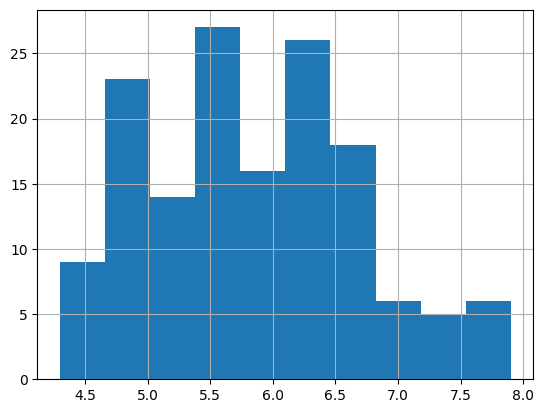

In [16]:
df['SepalLengthCm'].hist()

<Axes: >

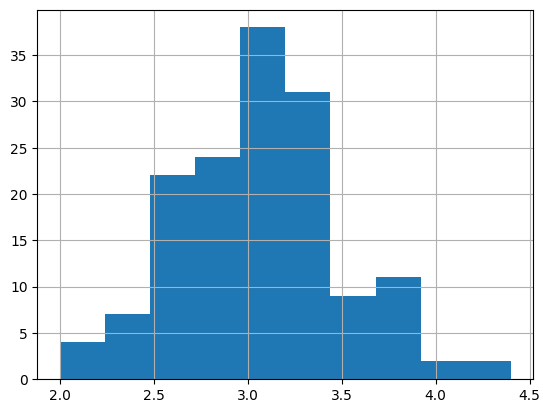

In [19]:
df['SepalWidthCm'].hist()

<Axes: >

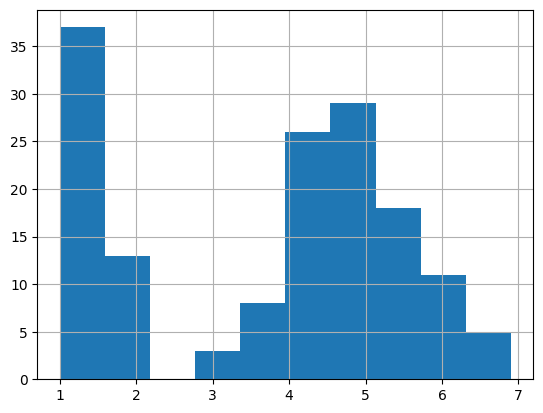

In [20]:
df['PetalLengthCm'].hist()

<Axes: >

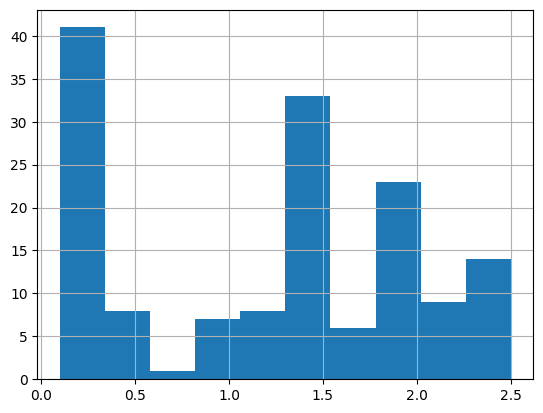

In [21]:
df['PetalWidthCm'].hist()

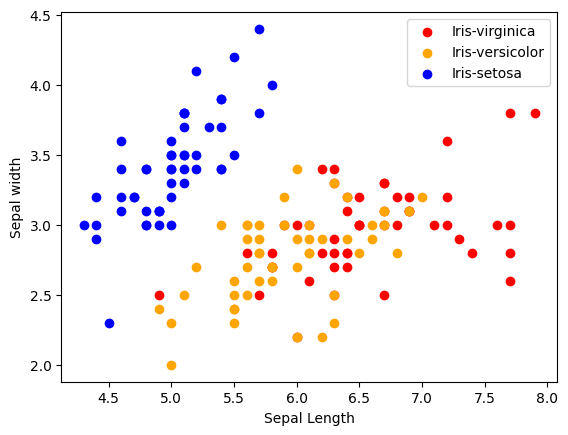

In [25]:
#scatterplot 
colors =['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    c =df[df['Species'] == species[i]]
    plt.scatter(c['SepalLengthCm'], c['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.legend()

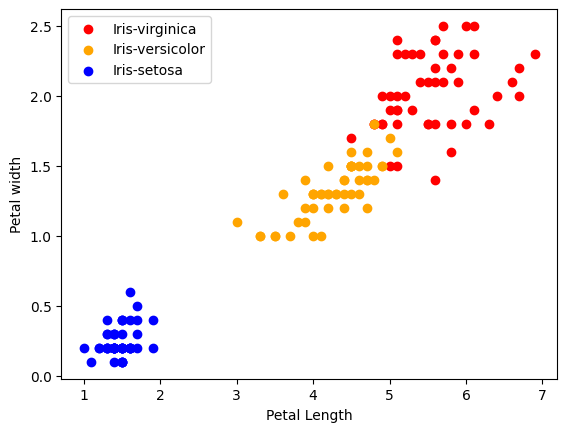

In [26]:
for i in range(3):
    c =df[df['Species'] == species[i]]
    plt.scatter(c['PetalLengthCm'], c['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.legend()

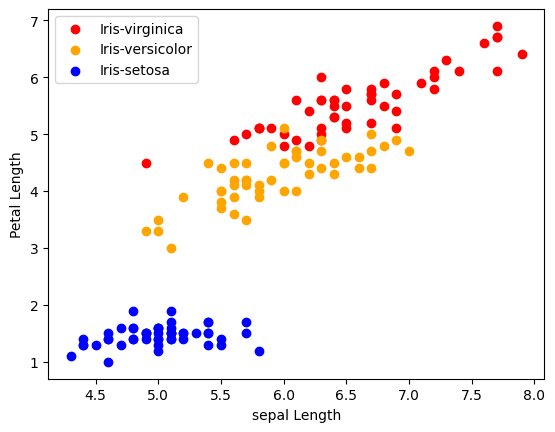

In [30]:
for i in range(3):
    c =df[df['Species'] == species[i]]
    plt.scatter(c['SepalLengthCm'], c['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("Petal Length")
plt.legend()

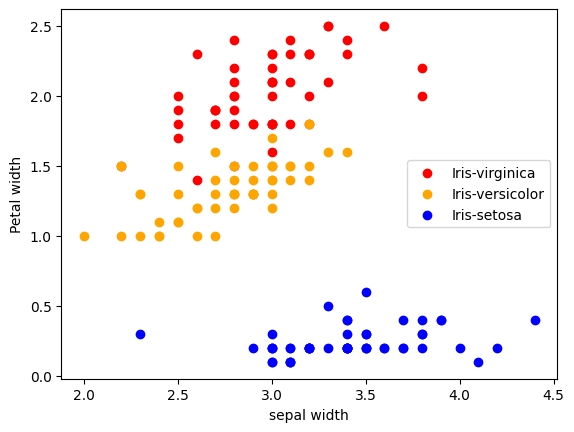

In [31]:
for i in range(3):
    c =df[df['Species'] == species[i]]
    plt.scatter(c['SepalWidthCm'], c['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("sepal width")
plt.ylabel("Petal width")
plt.legend()

Coorelation Matrix


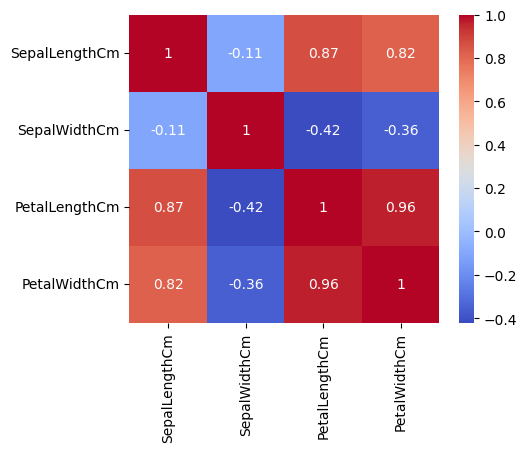

In [40]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create the heatmap
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

Label Encoder


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training


In [45]:
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [46]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [48]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [50]:
# knn - k-nearest neighbours
model = KNeighborsClassifier()

In [51]:
model.fit(x_train, y_train)


KNeighborsClassifier()

In [52]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [53]:
# decision tree
model = DecisionTreeClassifier()

In [54]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [55]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
